# Demo for morpc.plot

## Plot from Resource

Plot a graph or chart from a frictionless resource based on schema and data types. 

In [1]:
import morpc

## Build a sample resource file.

In [2]:
df, resource, schema = morpc.frictionless.load_data('../../morpc-pop-collect/output_data/morpc-pop-collect.resource.yaml')

morpc.load_data | INFO | Loading Frictionless Resource file at location ..\..\morpc-pop-collect\output_data\morpc-pop-collect.resource.yaml
morpc.load_data | INFO | Loading data, resource file, and schema from their source locations
morpc.load_data | INFO | --> Data file: ..\..\morpc-pop-collect\output_data\morpc-pop-collect.csv
morpc.load_data | INFO | --> Resource file: ..\..\morpc-pop-collect\output_data\morpc-pop-collect.resource.yaml
morpc.load_data | INFO | --> Schema file: ..\..\morpc-pop-collect\output_data\morpc-pop-collect.schema.yaml
morpc.load_data | INFO | Loading data.
cast_field_types | INFO | Casting field POP as type integer.
cast_field_types | INFO | Casting field GEOIDFQ as type string.
cast_field_types | INFO | Casting field SUMLEVEL as type string.
cast_field_types | INFO | Casting field REFERENCE_PERIOD as type date.
cast_field_types | INFO | Casting field REFERENCE_PERIOD_FREQ as type string.
cast_field_types | INFO | Casting field VINTAGE_PERIOD as type string.


In [16]:
df.groupby(['GEOIDFQ', 'REFERENCE_PERIOD'])['VINTAGE_PERIOD'].max()

GEOIDFQ         REFERENCE_PERIOD
0500000US39041  2000-01-01          2012
                2001-01-01          2012
                2002-01-01          2012
                2003-01-01          2012
                2004-01-01          2012
                2005-01-01          2012
                2006-01-01          2012
                2007-01-01          2012
                2008-01-01          2012
                2009-01-01          2012
                2010-01-01          2019
                2011-01-01          2019
                2012-01-01          2019
                2013-01-01          2019
                2014-01-01          2019
                2015-01-01          2019
                2016-01-01          2019
                2017-01-01          2019
                2018-01-01          2019
                2019-01-01          2019
                2020-01-01          2023
                2021-01-01          2023
                2022-01-01          2023
                2023-01-

In [8]:
df['VALUE_TYPE']

0     ESTIMATE
1     ESTIMATE
2     ESTIMATE
3     ESTIMATE
4     ESTIMATE
5     ESTIMATE
6     ESTIMATE
7     ESTIMATE
8     ESTIMATE
9     ESTIMATE
10    ESTIMATE
11    ESTIMATE
12    ESTIMATE
13    ESTIMATE
14    ESTIMATE
15    ESTIMATE
16    ESTIMATE
17    ESTIMATE
18    ESTIMATE
19    ESTIMATE
20    ESTIMATE
21    ESTIMATE
22    ESTIMATE
23    ESTIMATE
24    ESTIMATE
25    ESTIMATE
26    ESTIMATE
27    ESTIMATE
28    ESTIMATE
29    ESTIMATE
30    ESTIMATE
31    ESTIMATE
32    ESTIMATE
33    ESTIMATE
34    ESTIMATE
35    ESTIMATE
36    ESTIMATE
37    FORECAST
38    FORECAST
39    FORECAST
40    FORECAST
41    FORECAST
42    FORECAST
Name: VALUE_TYPE, dtype: string

In [6]:
plot = morpc.from_resource(df, schema, resource, x='REFERENCE_PERIOD', y='POP', group='VALUE_TYPE').col()

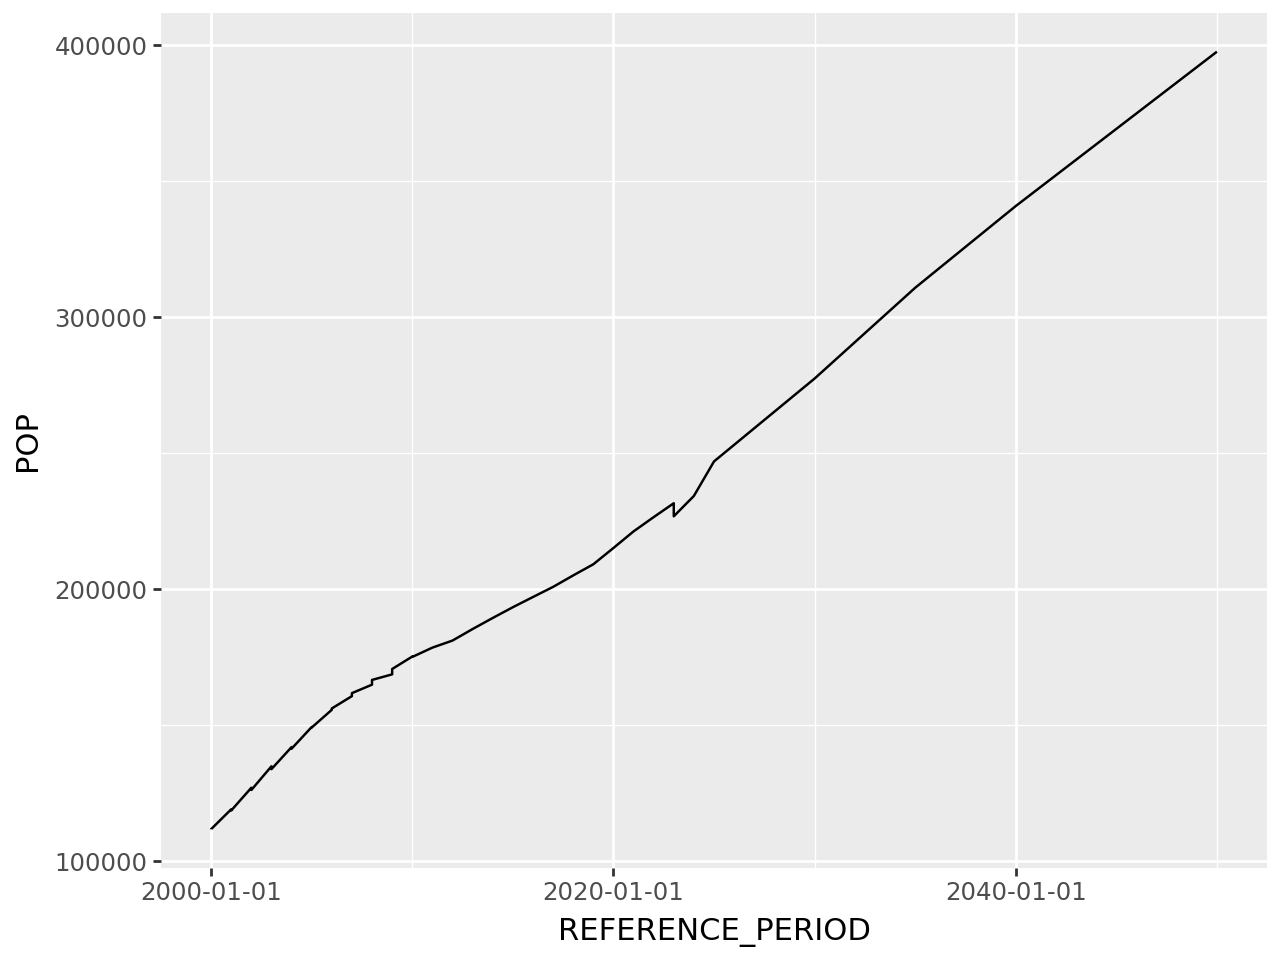

In [10]:
import plotnine


(plotnine.ggplot(df)
 + plotnine.geom_line(plotnine.aes(x='REFERENCE_PERIOD', y='POP')))